In [ ]:
from transformers import BertTokenizer

# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Input text
text = "Large language models are fascinating!"

# Tokenize the text
tokens = tokenizer.tokenize(text)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print("Tokens:", tokens)
print("Token IDs:", token_ids)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Tokens: ['large', 'language', 'models', 'are', 'fascinating', '!']
Token IDs: [2312, 2653, 4275, 2024, 17160, 999]


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
from transformers import BertTokenizer,GPT2Tokenizer
tok1=BertTokenizer.from_pretrained("bert-base-uncased")
tok2=GPT2Tokenizer.from_pretrained("gpt2")
text="The field of Natural Language Processing is evolving rapidly."
tokens1=tok1.tokenize(text)
tokens2=tok2.tokenize(text)
print("Tokens1:",tokens1)
print("Tokens2:",tokens2)

Tokens1: ['the', 'field', 'of', 'natural', 'language', 'processing', 'is', 'evolving', 'rapidly', '.']
Tokens2: ['The', 'Ġfield', 'Ġof', 'ĠNatural', 'ĠLanguage', 'ĠProcessing', 'Ġis', 'Ġevolving', 'Ġrapidly', '.']


In [ ]:
tok1_ids=tok1.convert_tokens_to_ids(tokens1)
print("Token IDs1:",tok1_ids)
tok1_tokens=tok1.convert_ids_to_tokens(tok1_ids)
print("Tokens1:",tok1_tokens)


Token IDs1: [1996, 2492, 1997, 3019, 2653, 6364, 2003, 20607, 5901, 1012]
Tokens1: ['the', 'field', 'of', 'natural', 'language', 'processing', 'is', 'evolving', 'rapidly', '.']


In [ ]:
from transformers import BertModel, BertTokenizer
import torch

# Initialize model and tokenizer
model = BertModel.from_pretrained("bert-base-uncased", output_attentions=True)
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize input
text = "The transformer model revolutionized NLP."
inputs = tokenizer(text, return_tensors="pt")

# Pass through BERT model and get attention weights
outputs = model(**inputs)
attentions = outputs.attentions  # List of attention scores

# Print attention scores for the first layer
print(attentions[0].shape)  # Shape: (batch_size, num_heads, seq_length, seq_length)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


torch.Size([1, 12, 11, 11])


In [ ]:
print(attentions[0][0][2])

tensor([[7.9633e-01, 3.7853e-02, 1.0754e-02, 9.0971e-03, 2.2630e-02, 1.6069e-02,
         1.1013e-02, 8.2637e-03, 6.8486e-03, 2.9736e-02, 5.1403e-02],
        [7.2604e-01, 1.3160e-01, 1.7543e-02, 2.2664e-02, 1.2312e-02, 2.5867e-02,
         2.1054e-03, 5.5797e-04, 3.0448e-03, 1.8471e-02, 3.9803e-02],
        [5.6260e-01, 3.4936e-01, 8.0652e-03, 1.8634e-02, 1.4893e-02, 1.6319e-02,
         7.3232e-03, 1.2906e-03, 1.1880e-04, 8.4096e-03, 1.2980e-02],
        [2.3729e-03, 5.4427e-03, 9.5315e-01, 1.2477e-03, 2.9325e-02, 4.7720e-03,
         2.2330e-04, 1.3092e-03, 4.6340e-04, 4.0968e-04, 1.2799e-03],
        [9.4678e-02, 4.0991e-02, 1.1715e-01, 5.6372e-01, 4.6812e-02, 5.9317e-02,
         4.2705e-02, 5.0736e-03, 1.3639e-02, 1.4272e-02, 1.6439e-03],
        [1.4622e-01, 2.4499e-02, 3.3219e-03, 6.6697e-02, 6.9075e-01, 1.5136e-02,
         1.4904e-02, 7.4737e-03, 1.7412e-03, 2.3696e-02, 5.5555e-03],
        [3.6254e-03, 2.8432e-04, 2.5214e-04, 4.3030e-04, 1.9069e-03, 9.8575e-01,
         2.93

In [ ]:
s1="The cat sat on the mat"
s2="BERT is a transformer model"
in1=tokenizer(s1,return_tensors="pt")
in2=tokenizer(s2,return_tensors="pt")
print(in1)
print(in2)

{'input_ids': tensor([[  101,  1996,  4937,  2938,  2006,  1996, 13523,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}
{'input_ids': tensor([[  101, 14324,  2003,  1037, 10938,  2121,  2944,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}


In [ ]:
o1=model(**in1)
o2=model(**in2)
a1=o1.attentions
a2=o2.attentions
print(a1[0].shape)
print(a2[0].shape)

torch.Size([1, 12, 8, 8])
torch.Size([1, 12, 8, 8])


In [ ]:
print(inputs)

{'input_ids': tensor([[  101,  1996, 10938,  2121,  2944,  4329,  3550, 17953,  2361,  1012,
           102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


In [ ]:
tokens=tokenizer.tokenize(text)
tokens = ['[CLS]'] + tokens + ['[SEP]']
print(tokens)

['[CLS]', 'the', 'transform', '##er', 'model', 'revolution', '##ized', 'nl', '##p', '.', '[SEP]']


In [ ]:
input_ids = tokenizer.convert_tokens_to_ids(tokens)
print(input_ids)

[101, 1996, 10938, 2121, 2944, 4329, 3550, 17953, 2361, 1012, 102]


In [ ]:
input_ids_tensor=torch.tensor([input_ids])
print(input_ids_tensor)

tensor([[  101,  1996, 10938,  2121,  2944,  4329,  3550, 17953,  2361,  1012,
           102]])


In [ ]:
with torch.no_grad():
    outputs = model(input_ids_tensor)
print(outputs.attentions)

(tensor([[[[6.1326e-02, 1.3924e-01, 4.8631e-02,  ..., 5.9569e-02,
           1.2604e-01, 3.1484e-01],
          [1.0704e-01, 1.1454e-01, 8.1681e-02,  ..., 4.8979e-02,
           1.1733e-01, 1.0390e-01],
          [4.7944e-02, 4.0360e-02, 7.6033e-02,  ..., 1.0001e-01,
           4.1437e-02, 8.3898e-02],
          ...,
          [4.6726e-02, 3.0772e-02, 1.3684e-01,  ..., 6.1306e-02,
           4.1284e-02, 5.7196e-02],
          [7.9646e-02, 8.2366e-02, 8.8829e-02,  ..., 6.5409e-02,
           1.5463e-01, 1.1585e-01],
          [1.0619e-01, 1.0939e-01, 6.5077e-02,  ..., 3.8098e-02,
           1.7707e-01, 1.6385e-01]],

         [[7.9972e-01, 1.9842e-02, 1.0370e-02,  ..., 2.1872e-02,
           4.5966e-02, 8.1975e-03],
          [6.8617e-02, 9.0688e-02, 9.8567e-02,  ..., 3.6243e-02,
           1.5982e-01, 7.2414e-02],
          [6.3175e-02, 2.1505e-02, 7.3802e-02,  ..., 2.2449e-02,
           1.7978e-02, 9.1418e-02],
          ...,
          [1.8912e-01, 8.2425e-02, 1.8938e-01,  ..., 6.865

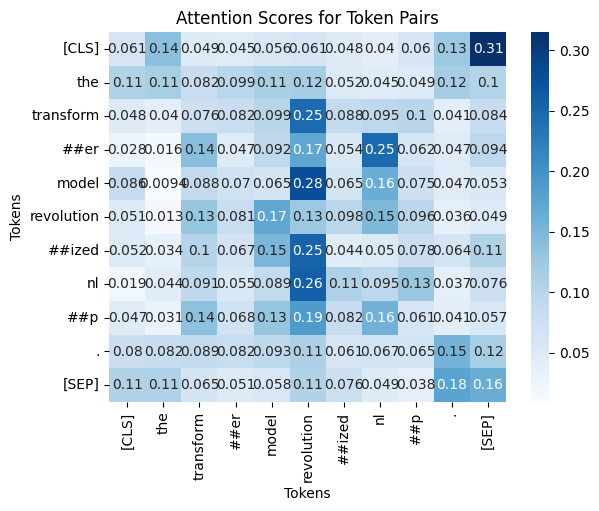

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

attention_matrix = attentions[0][0][0].detach().numpy()

sns.heatmap(attention_matrix, annot=True, cmap="Blues", xticklabels=tokens, yticklabels=tokens)
plt.xlabel("Tokens")
plt.ylabel("Tokens")
plt.title("Attention Scores for Token Pairs")
plt.show()


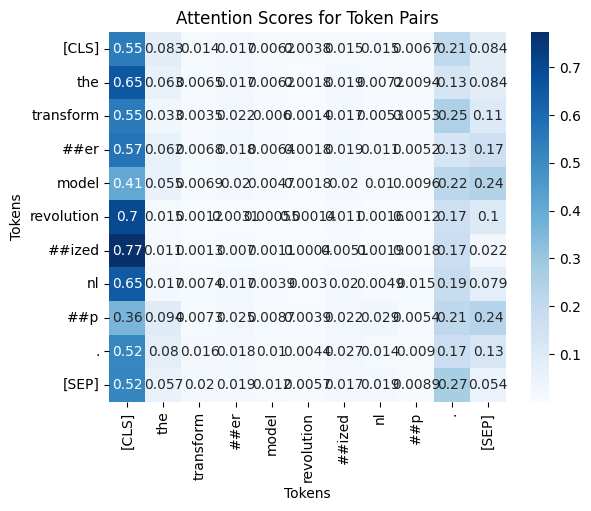

In [ ]:
#Layer 2 head 3
attention_matrix = attentions[1][0][3].detach().numpy()
sns.heatmap(attention_matrix, annot=True, cmap="Blues", xticklabels=tokens, yticklabels=tokens)
plt.xlabel("Tokens")
plt.ylabel("Tokens")
plt.title("Attention Scores for Token Pairs")
plt.show()

BERT Task

In [ ]:
from transformers import BertTokenizer

# Initialize BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Sample text
text = "The transformer model revolutionized NLP."

# Tokenize text
inputs = tokenizer(text, return_tensors='pt')

# Extract tokens, input IDs, and attention masks
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'].squeeze().tolist())
input_ids = inputs['input_ids']
attention_mask = inputs['attention_mask']

print("Tokens:", tokens)
print("Input IDs:", input_ids)
print("Attention Mask:", attention_mask)


Tokens: ['[CLS]', 'the', 'transform', '##er', 'model', 'revolution', '##ized', 'nl', '##p', '.', '[SEP]']
Input IDs: tensor([[  101,  1996, 10938,  2121,  2944,  4329,  3550, 17953,  2361,  1012,
           102]])
Attention Mask: tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
texts=["It rained today in the afternoon","LLM's are rapidly changing the landscape of AI"]
in1=tokenizer(texts,return_tensors="pt",padding=True)
print(in1)

{'input_ids': tensor([[  101,  2009, 28270,  2651,  1999,  1996,  5027,   102,     0,     0,
             0,     0,     0],
        [  101,  2222,  2213,  1005,  1055,  2024,  5901,  5278,  1996,  5957,
          1997,  9932,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}
